#EDA - Exploratory Data Analysis

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("NBA_stats.csv")

In [3]:
data.head()

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,2-points Field Goal,2-points Field Goal Attempted,Free Throws,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
0,Álex Abrines,SG,24,OKC,75,15.1,1.5,3.9,1.1,2.9,0.4,0.9,0.5,0.6,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1,2018
1,Quincy Acy,PF,27,BRK,70,19.4,1.9,5.2,1.5,4.2,0.4,1.0,0.7,0.9,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2,2018
2,Steven Adams,C,24,OKC,76,32.7,5.9,9.4,0.0,0.0,5.9,9.3,2.1,3.8,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,3,2018
3,Bam Adebayo,C,20,MIA,69,19.8,2.5,4.9,0.0,0.1,2.5,4.8,1.9,2.6,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,4,2018
4,Arron Afflalo,SG,32,ORL,53,12.9,1.2,3.1,0.5,1.3,0.7,1.7,0.4,0.5,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,5,2018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         2728 non-null   object 
 1   Pos                            2728 non-null   object 
 2   Age                            2728 non-null   int64  
 3   Team                           2728 non-null   object 
 4   Games                          2728 non-null   int64  
 5   Minutes Played                 2728 non-null   float64
 6   Fields Goal                    2728 non-null   float64
 7   Fields Goal Attempted          2728 non-null   float64
 8   3-points Field Goal            2728 non-null   float64
 9   3-points Field Goal Attempted  2728 non-null   float64
 10  2-points Field Goal            2728 non-null   float64
 11  2-points Field Goal Attempted  2728 non-null   float64
 12  Free Throws                    2728 non-null   f

In [5]:
data.tail()

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,2-points Field Goal,2-points Field Goal Attempted,Free Throws,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
2723,Delon Wright,PG,28,SAC,27,25.8,3.9,8.3,1.2,3.1,2.6,5.3,1.1,1.3,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,536,2021
2724,Thaddeus Young,PF,32,CHI,68,24.3,5.4,9.7,0.2,0.7,5.3,9.1,1.0,1.7,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,537,2021
2725,Trae Young,PG,22,ATL,63,33.7,7.7,17.7,2.2,6.3,5.6,11.3,7.7,8.7,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,538,2021
2726,Cody Zeller,C,28,CHO,48,20.9,3.8,6.8,0.1,0.6,3.7,6.2,1.8,2.5,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,539,2021
2727,Ivica Zubac,C,23,LAC,72,22.3,3.6,5.5,0.0,0.1,3.6,5.4,1.9,2.4,2.6,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9.0,540,2021


In [6]:
data.describe()

,Age,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,2-points Field Goal,2-points Field Goal Attempted,Free Throws,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,25.994868,40.441349,19.135960,3.076026,6.810704,0.890836,2.548570,2.186694,4.264846,1.304509,1.707735,0.799084,2.694941,3.492045,1.840506,0.609897,0.383834,1.065029,1.667815,8.343585,267.861437,2019.512097
std,4.099958,24.811372,9.135915,2.180854,4.564814,0.827013,2.130376,1.761301,3.268963,1.273998,1.572987,0.734809,1.829902,2.415955,1.708985,0.415554,0.394190,0.792267,0.794244,6.030599,154.026176,1.119812
min,19.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,23.000000,18.000000,12.000000,1.400000,3.400000,0.200000,0.800000,0.900000,1.800000,0.500000,0.700000,0.300000,1.400000,1.800000,0.700000,0.300000,0.100000,0.500000,1.100000,3.900000,133.000000,2019.000000
50%,25.000000,42.000000,18.900000,2.600000,5.800000,0.700000,2.100000,1.700000,3.400000,0.900000,1.300000,0.600000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.700000,6.900000,265.500000,2019.000000
75%,29.000000,63.000000,26.700000,4.300000,9.400000,1.400000,3.800000,3.000000,5.800000,1.700000,2.300000,1.000000,3.600000,4.600000,2.400000,0.800000,0.500000,1.400000,2.200000,11.500000,401.000000,2021.000000
max,43.000000,82.000000,37.600000,11.200000,24.500000,5.300000,13.200000,10.200000,18.700000,10.200000,11.800000,5.400000,11.400000,16.000000,11.700000,2.400000,3.400000,5.000000,5.000000,36.100000,540.000000,2021.000000


In [7]:
data.nunique()

Player                           875
Pos                               15
Age                               25
Team                              31
Games                             82
Minutes Played                   352
Fields Goal                      109
Fields Goal Attempted            211
3-points Field Goal               46
3-points Field Goal Attempted    104
2-points Field Goal               93
2-points Field Goal Attempted    158
Free Throws                       79
Free Throws Attempted             91
Offensive Rebounds                48
Defensive Rebounds               107
Total Rebounds                   134
Assists                           99
Steals                            25
Blocks                            29
Turnovers                         48
Personal Fouls                    43
Points                           277
Rank                             540
Year                               4
dtype: int64

In [9]:
print("This dataset have {} null values.".format(data.isnull().sum().sum()))

This dataset have 0 null values.


In [10]:
data.sample(1)

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,2-points Field Goal,2-points Field Goal Attempted,Free Throws,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
836,Matthew Dellavedova,PG,28,CLE,36,19.9,2.6,6.2,1.1,3.3,1.4,2.9,1.1,1.3,0.2,1.7,1.9,4.2,0.3,0.1,1.6,1.8,7.3,133,2019


In [14]:
u_teams = len(list(data['Team'].unique()))
print("-----------------------------------")
print(f"There are total {u_teams} different teams.")

-----------------------------------
There are total 31 different teams.


Which Team Played Most Games

In [23]:
total_games_played_by_teams = data.groupby('Team')['Games'].sum().reset_index()

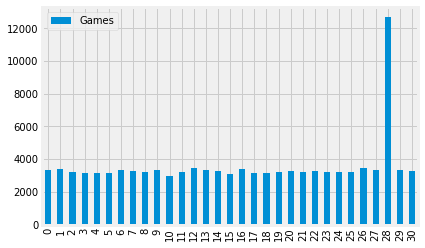

In [28]:
total_games_played_by_teams.plot(kind="bar")

In [31]:
gms = total_games_played_by_teams.loc[28]['Games']
tms = total_games_played_by_teams.loc[28]['Team']

print("----------------------------------------")
print("Most games {} played by {} Team.".format(gms, tms))

----------------------------------------
Most games 12670 played by TOT Team.


In Which Year Most Games Played

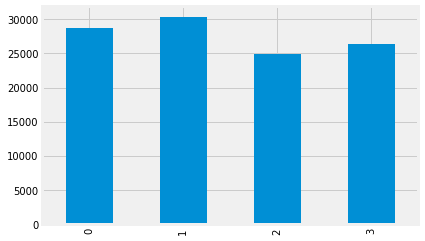

In [37]:
most_games_played_in_year = data.groupby('Year')['Games'].sum().reset_index()
most_games_played_in_year['Games'].plot(kind="bar")

In [39]:
yr = most_games_played_in_year.loc[3]['Year']
yr_gms = most_games_played_in_year.loc[3]['Games']
print("-------------------------------------")
print(f"Most games {yr_gms} played in the year {yr}.")

-------------------------------------
Most games 26345 played in the year 2021.


Which Team Played More Minutes

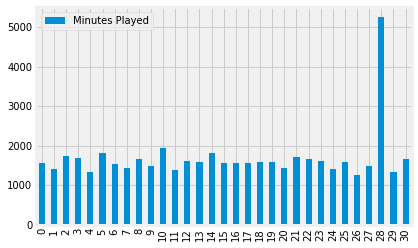

In [42]:
total_minutes_played_by = data.groupby('Team')['Minutes Played'].sum().reset_index()
total_minutes_played_by.plot(kind="bar")

In [45]:
tm = total_minutes_played_by.loc[28]['Team']
mins = total_minutes_played_by.loc[28]['Minutes Played']

print("----------------------------------------")
print("Team {} played most of {} Minutes.".format(tm, mins))

----------------------------------------
Team TOT played most of 5246.3 Minutes.


Which Team Have Maximum Points

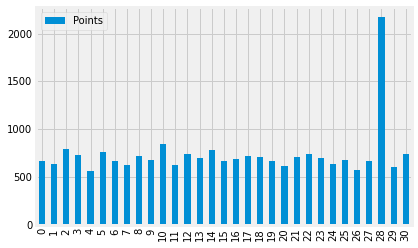

In [48]:
wthmp = data.groupby('Team')['Points'].sum().reset_index()
wthmp.plot(kind="bar")

In [50]:
tm = wthmp.loc[28]['Team']
pts = wthmp.loc[28]['Points']

print("----------------------------------------")
print("Team {} has earned most {} points.".format(tm, pts))

----------------------------------------
Team TOT has earned most 2168.3 points.


Which player has the most field goals in the year 2020?

In [57]:
wpmfy = data.groupby(['Player', 'Year'])['Fields Goal Attempted'].sum().reset_index()

In [61]:
pl_fg = wpmfy[wpmfy['Fields Goal Attempted'] == wpmfy['Fields Goal Attempted'].max()]

In [66]:
print("Player {} has attempted most field goals of {} in {}.".format(pl_fg['Player'].values[0], pl_fg['Fields Goal Attempted'].values[0], pl_fg['Year'].values[0]))

Player Victor Oladipo has attempted most field goals of 64.3 in 2021.


Which player has played most matches?

In [70]:
wppmm = data.groupby('Player')['Games'].sum().reset_index()

In [73]:
print("---------------------------------------")
print("Player {} have played most games of {}.".format(wppmm.max()['Player'], wppmm.max()['Games']))

---------------------------------------
Player Ömer Aşık have played most games of 458.


Player with the most rebounds and assists?

In [76]:
pmr = data.groupby('Player')['Total Rebounds'].sum().reset_index()
pma = data.groupby('Player')['Assists'].sum().reset_index()

In [80]:
print("---------------------------------------")
print("Player {} most rebounds of {}.".format(pmr.max()['Player'], pmr.max()['Total Rebounds']))

---------------------------------------
Player Ömer Aşık most rebounds of 109.4.


In [82]:
print("---------------------------------------")
print("Player {} most assists of {}.".format(pma.max()['Player'], pma.max()['Assists']))

---------------------------------------
Player Ömer Aşık most assists of 55.900000000000006.


In [83]:
corr = data.corr()

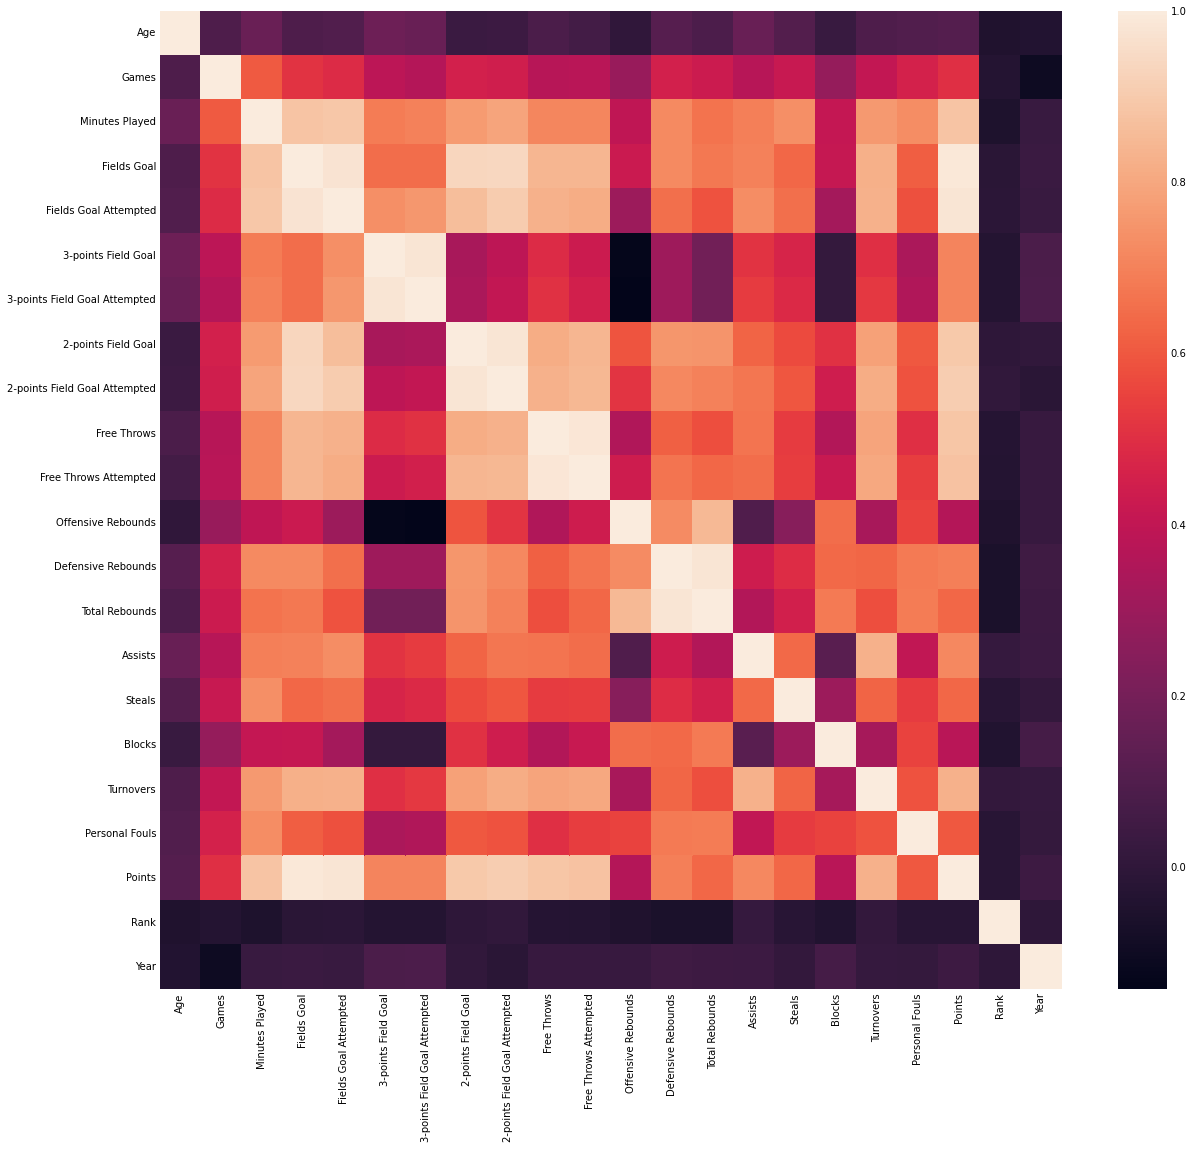

In [84]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0.5, 0, 'Age')

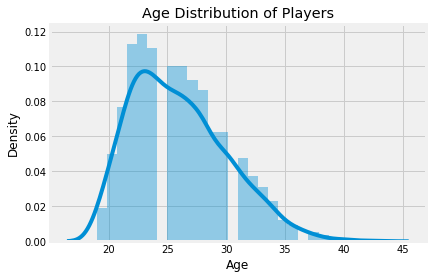

In [89]:
sns.distplot(x=data["Age"])
plt.title("Age Distribution of Players")
plt.xlabel("Age")

EDA By Muhammad Hanan Asghar